In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
dataset=pd.read_csv("penguins_size.csv")

In [ ]:
dataset

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,30.0,20.0,188,3290,FEMALE
4,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
342,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


# **Pre-Processing**

In [ ]:
dataset.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
lb = LabelEncoder()
dataset["sex"] = lb.fit_transform(dataset["sex"])
dataset

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,1
1,Adelie,Torgersen,39.5,17.4,186,3800,0
2,Adelie,Torgersen,40.3,18.0,195,3250,0
3,Adelie,Torgersen,30.0,20.0,188,3290,0
4,Adelie,Torgersen,36.7,19.3,193,3450,0
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,47.2,13.7,214,4925,0
340,Gentoo,Biscoe,46.8,14.3,215,4850,0
341,Gentoo,Biscoe,50.4,15.7,222,5750,1
342,Gentoo,Biscoe,45.2,14.8,212,5200,0


In [ ]:
dataset['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [ ]:
dataset['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [ ]:
dataset['culmen_length_mm'].value_counts()

41.1    7
45.2    6
39.6    5
50.5    5
46.5    5
       ..
35.6    1
36.8    1
43.1    1
38.5    1
49.9    1
Name: culmen_length_mm, Length: 165, dtype: int64

In [ ]:
dataset['culmen_depth_mm'].value_counts()

17.0    12
18.6    10
17.9    10
15.0    10
18.5    10
        ..
13.2     1
14.9     1
21.5     1
20.2     1
17.4     1
Name: culmen_depth_mm, Length: 80, dtype: int64

In [ ]:
dataset['flipper_length_mm'].value_counts()

190    22
195    17
187    16
193    15
210    14
191    13
215    12
197    10
196    10
185     9
208     8
198     8
216     8
220     8
186     7
230     7
192     7
214     7
181     7
212     7
189     7
184     7
188     7
213     6
217     6
199     6
222     6
201     6
209     5
219     5
218     5
221     5
203     5
194     5
180     5
178     4
225     4
228     4
202     4
200     4
182     3
224     3
205     3
229     2
183     2
207     2
223     2
211     2
231     1
206     1
174     1
172     1
179     1
176     1
226     1
Name: flipper_length_mm, dtype: int64

In [ ]:
dataset['body_mass_g'].value_counts()

3800    12
3700    11
3950    10
3900    10
3550     9
        ..
4475     1
3975     1
3575     1
3850     1
5750     1
Name: body_mass_g, Length: 95, dtype: int64

In [ ]:
dataset['sex'].value_counts()

1    177
0    167
Name: sex, dtype: int64

# **DATA ANALYSIS**

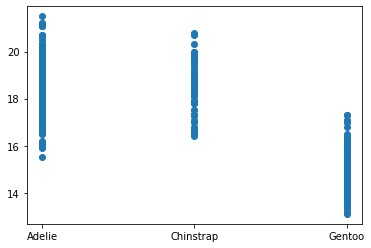

In [ ]:
plt.scatter(x=dataset['species'], y=dataset['culmen_depth_mm'])
plt.show()

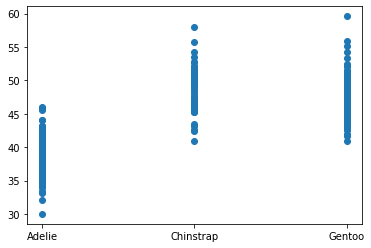

In [ ]:
plt.scatter(x=dataset['species'], y=dataset['culmen_length_mm'])
plt.show()

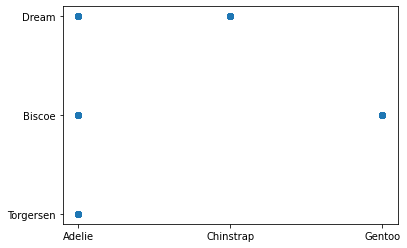

In [ ]:
plt.scatter(x=dataset['species'], y=dataset['island'])
plt.show()

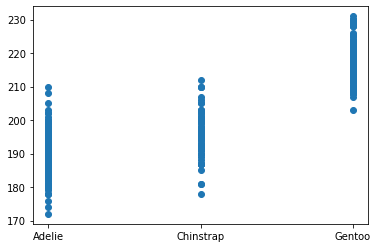

In [ ]:
plt.scatter(x=dataset['species'], y=dataset['flipper_length_mm'])
plt.show()

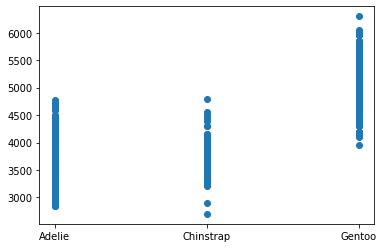

In [ ]:
plt.scatter(x=dataset['species'], y=dataset['body_mass_g'])
plt.show()

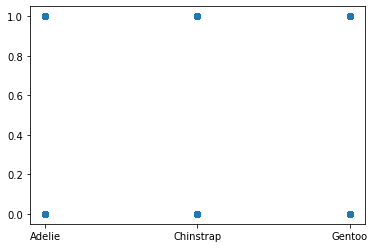

In [ ]:
plt.scatter(x=dataset['species'], y=dataset['sex'])
plt.show()

# **PAIRPLOTS**

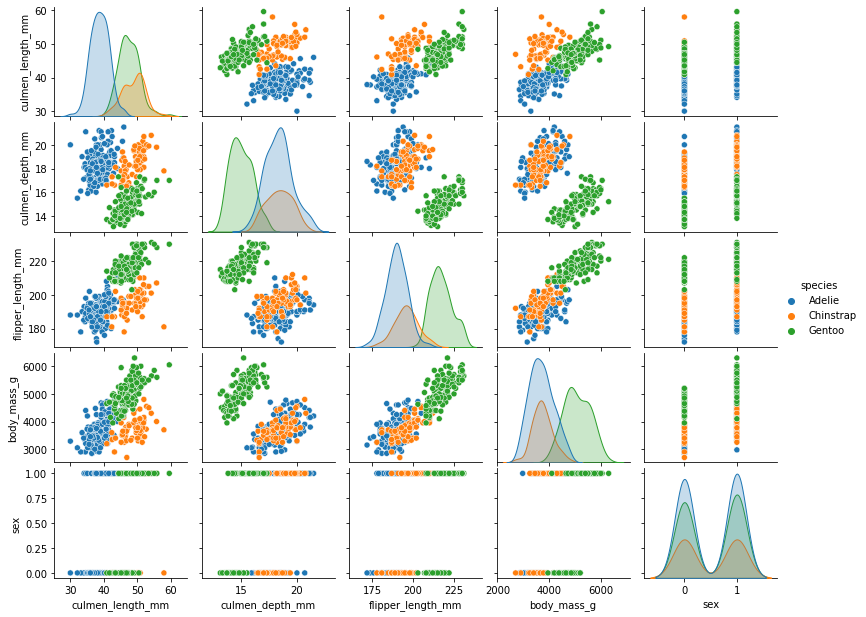

In [ ]:
pairplot_figure = sns.pairplot(dataset, hue="species")
pairplot_figure.fig.set_size_inches(12, 8.5)

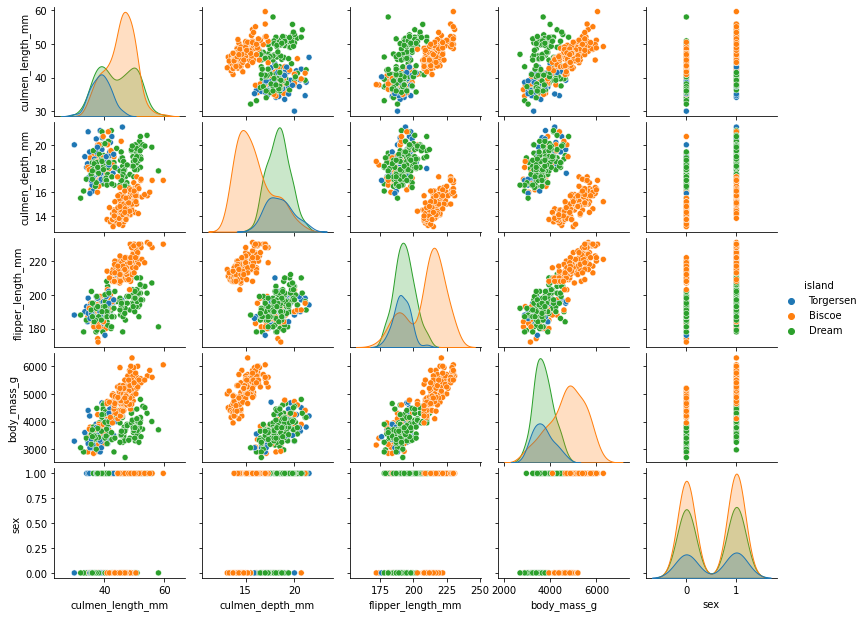

In [ ]:
pairplot_figure = sns.pairplot(dataset, hue="island")
pairplot_figure.fig.set_size_inches(12, 8.5)

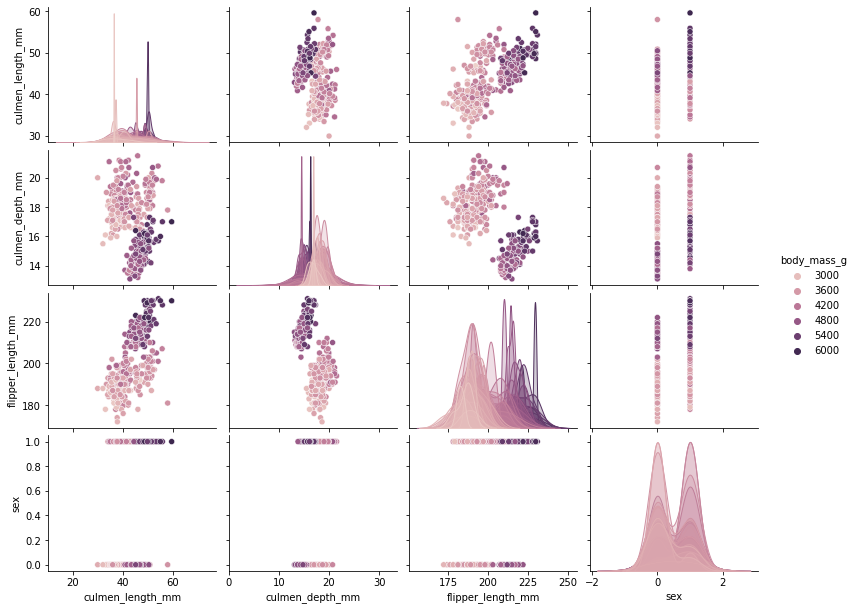

In [ ]:
pairplot_figure = sns.pairplot(dataset, hue="body_mass_g")
pairplot_figure.fig.set_size_inches(12, 8.5)

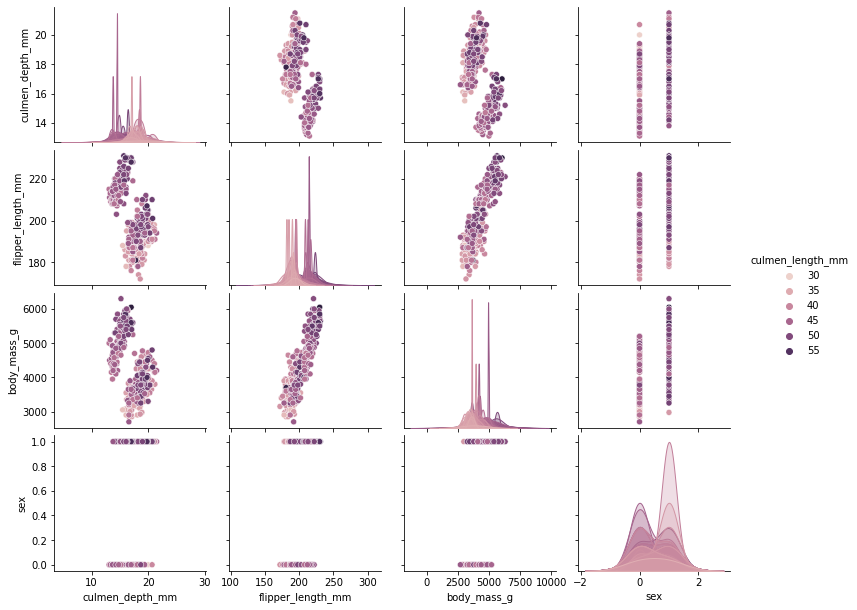

In [ ]:
pairplot_figure = sns.pairplot(dataset, hue="culmen_length_mm")
pairplot_figure.fig.set_size_inches(12, 8.5)

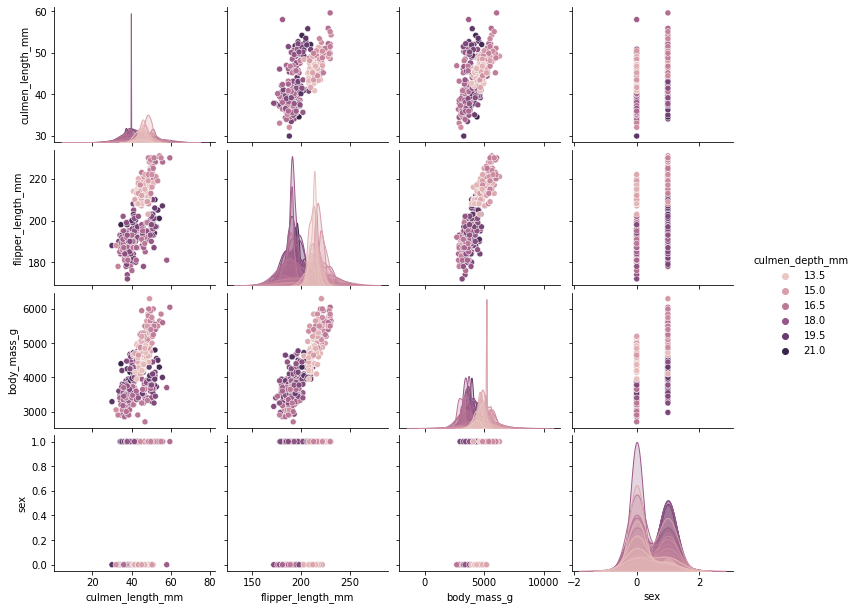

In [ ]:
pairplot_figure = sns.pairplot(dataset, hue="culmen_depth_mm")
pairplot_figure.fig.set_size_inches(12, 8.5)

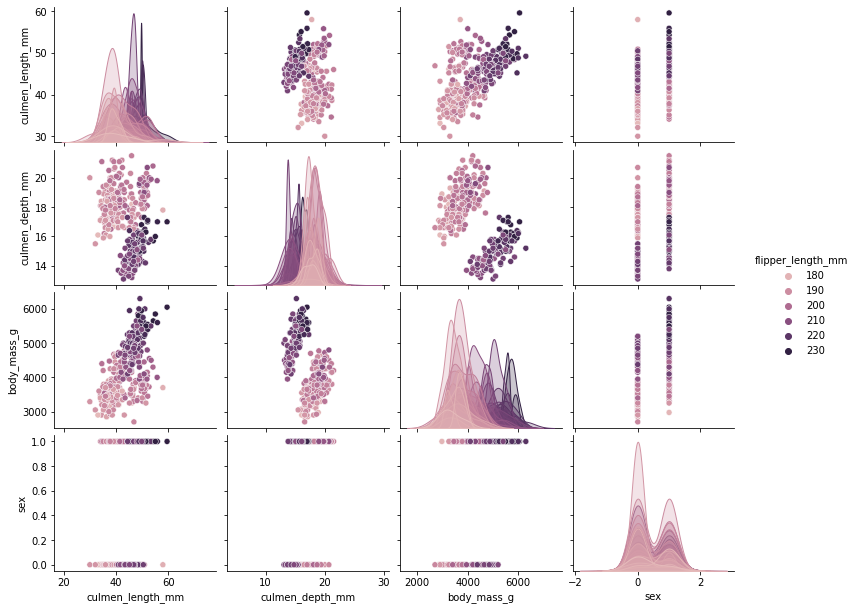

In [ ]:
pairplot_figure = sns.pairplot(dataset, hue="flipper_length_mm")
pairplot_figure.fig.set_size_inches(12, 8.5)

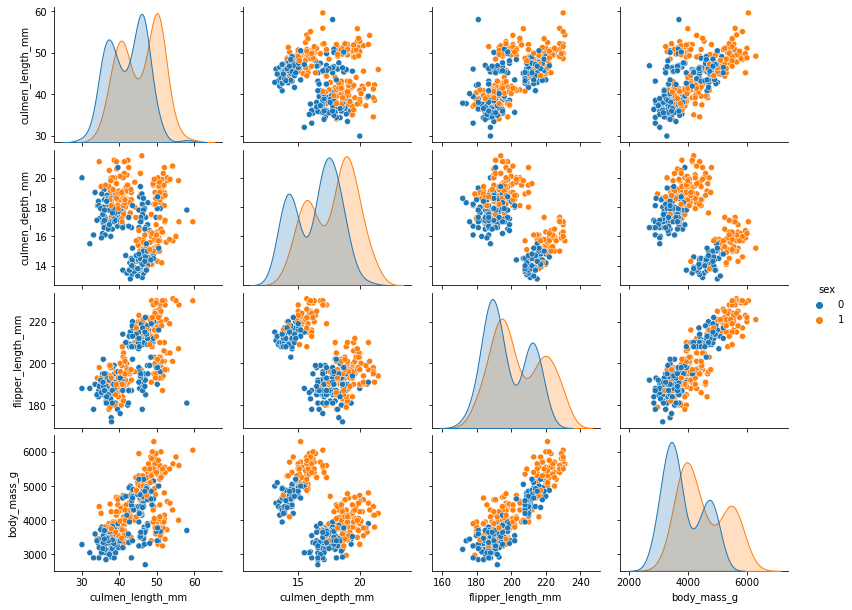

In [ ]:
pairplot_figure = sns.pairplot(dataset, hue="sex")
pairplot_figure.fig.set_size_inches(12, 8.5)

# **SCATTER PLOT**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


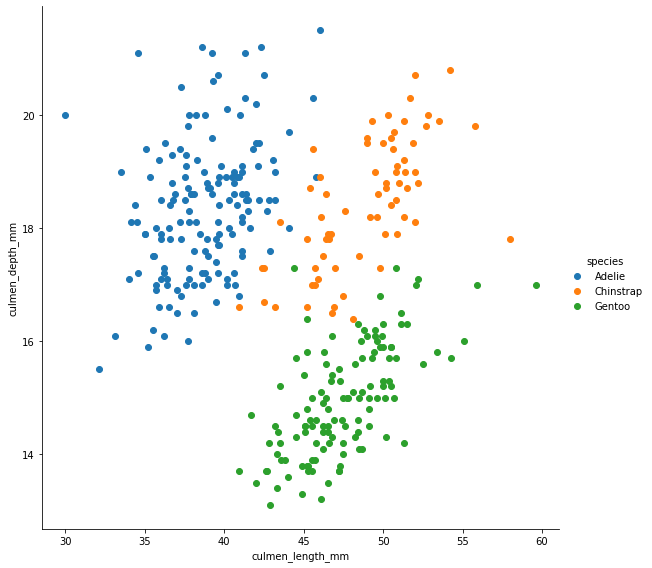

In [ ]:
sns.FacetGrid(dataset, hue="species", size=8) .map(plt.scatter, "culmen_length_mm", "culmen_depth_mm").add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


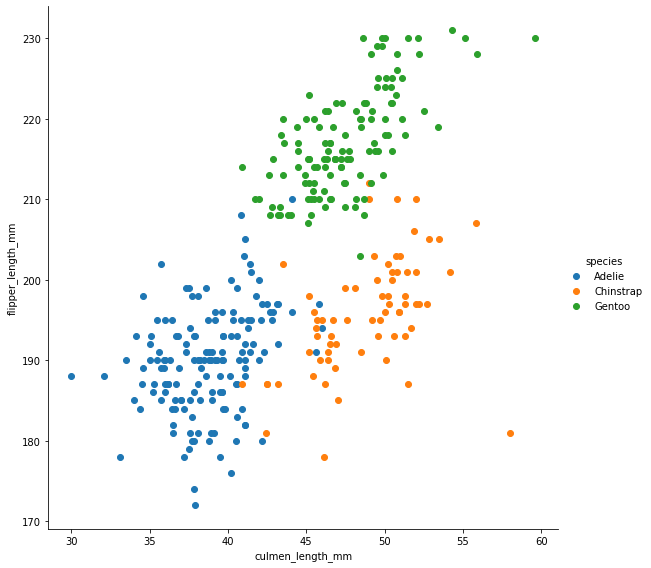

In [ ]:
sns.FacetGrid(dataset, hue="species", size=8) .map(plt.scatter, "culmen_length_mm", "flipper_length_mm").add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


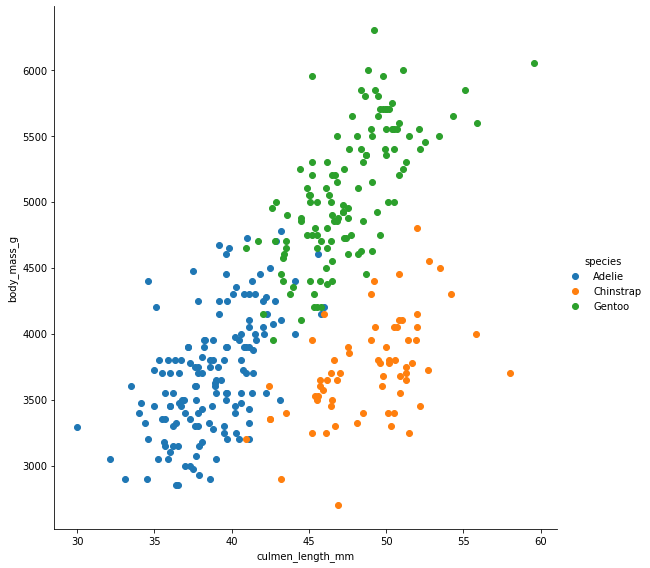

In [ ]:
sns.FacetGrid(dataset, hue="species", size=8) .map(plt.scatter, "culmen_length_mm", "body_mass_g").add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


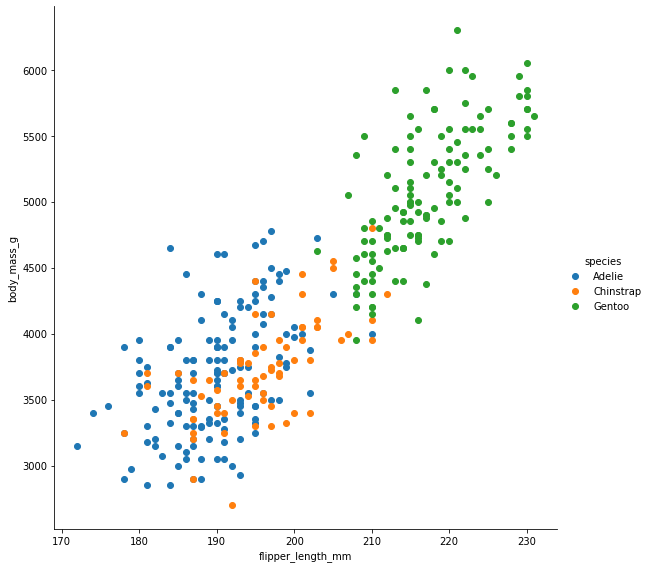

In [ ]:
sns.FacetGrid(dataset, hue="species", size=8) .map(plt.scatter, "flipper_length_mm", "body_mass_g").add_legend()

# **CLUSTERING**

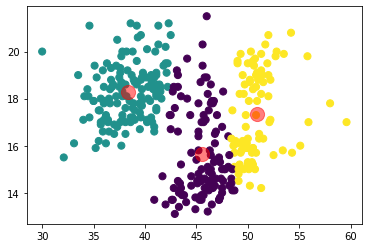

In [ ]:
X = dataset[['culmen_length_mm','culmen_depth_mm']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:, 'culmen_length_mm'], X.loc[:, 'culmen_depth_mm'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()

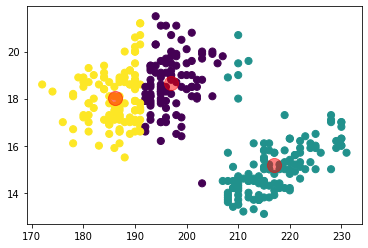

In [ ]:
X = dataset[['flipper_length_mm','culmen_depth_mm']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:, 'flipper_length_mm'], X.loc[:, 'culmen_depth_mm'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()

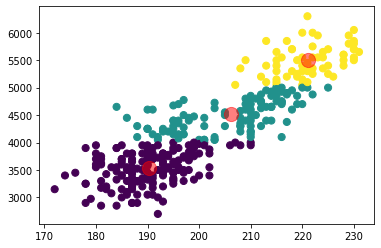

In [ ]:
X = dataset[['flipper_length_mm','body_mass_g']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:, 'flipper_length_mm'], X.loc[:, 'body_mass_g'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()

# **LINEAR REGRESSION WITH SINGLE VARIABLE**

In [ ]:
dataset

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,1
1,Adelie,Torgersen,39.5,17.4,186,3800,0
2,Adelie,Torgersen,40.3,18.0,195,3250,0
3,Adelie,Torgersen,30.0,20.0,188,3290,0
4,Adelie,Torgersen,36.7,19.3,193,3450,0
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,47.2,13.7,214,4925,0
340,Gentoo,Biscoe,46.8,14.3,215,4850,0
341,Gentoo,Biscoe,50.4,15.7,222,5750,1
342,Gentoo,Biscoe,45.2,14.8,212,5200,0


In [ ]:
reg=linear_model.LinearRegression()
reg.fit(dataset[['flipper_length_mm']],dataset.body_mass_g)

LinearRegression()

In [ ]:
test_x=dataset.iloc[:,ncols-3:ncols-2]
test_y=reg.predict(test_x)

In [ ]:
test_x

,flipper_length_mm
0,181
1,186
2,195
3,188
4,193
...,...
339,214
340,215
341,222
342,212


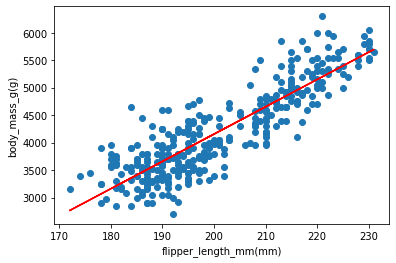

In [ ]:
plt.xlabel("flipper_length_mm(mm)")
plt.ylabel("body_mass_g(g)")
plt.scatter(dataset.flipper_length_mm, dataset.body_mass_g)
plt.plot(dataset.flipper_length_mm, reg.predict(dataset[['flipper_length_mm']]), color='red')

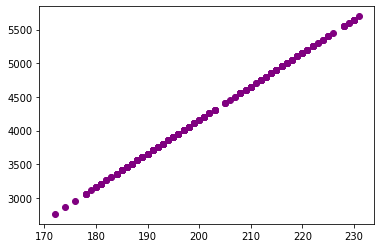

In [ ]:
plt.scatter(test_x, test_y, color='purple')

In [ ]:
score_test = reg.score(test_x, test_y)
print("Test Score is :", score_test)

Test Score is : 1.0


# **LINEAR REGRESSION WITH MULTI VARIABLE**

In [ ]:
feature_name = "flipper_length_mm"
target_name = "body_mass_g"

In [ ]:
data, target = dataset[[feature_name]], dataset[target_name]

In [ ]:
def linear_model_flipper_mass(
    flipper_length, weight_flipper_length, intercept_body_mass
):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

In [ ]:
flipper_length_range = np.linspace(data.min(), data.max(), num=300)

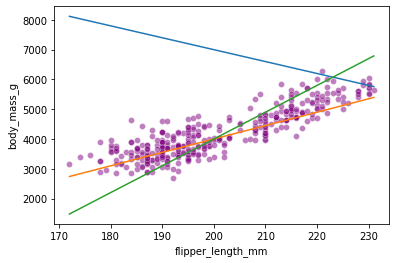

In [ ]:
weights = [-40, 45, 90]
intercepts = [15000, -5000, -14000]

ax = sns.scatterplot(data=dataset, x=feature_name, y=target_name,
                     color="purple", alpha=0.5)

label = "{0:.2f} (g / mm) * flipper length + {1:.2f} (g)"
for weight, intercept in zip(weights, intercepts):
    predicted_body_mass = linear_model_flipper_mass(
        flipper_length_range, weight, intercept)

    ax.plot(flipper_length_range, predicted_body_mass,
            label=label.format(weight, intercept))


# **KNNEIGHBOURS**

In [ ]:
ncols = dataset.shape[1]

In [ ]:
ncols

7

In [ ]:
x = dataset.iloc[:,ncols-5:ncols-1]
print(x)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0                39.1             18.7                181         3750
1                39.5             17.4                186         3800
2                40.3             18.0                195         3250
3                30.0             20.0                188         3290
4                36.7             19.3                193         3450
..                ...              ...                ...          ...
339              47.2             13.7                214         4925
340              46.8             14.3                215         4850
341              50.4             15.7                222         5750
342              45.2             14.8                212         5200
343              49.9             16.1                213         5400

[344 rows x 4 columns]


In [ ]:
y=dataset.iloc[:,ncols-7]
print(y)

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object


In [ ]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size = 0.2, random_state = 6)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

# Fit and predict
knn.fit(x_train, y_train)

predictions = knn.predict(x_test)
print(predictions)

['Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie'
 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie' 'Chinstrap'
 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Adelie'
 'Gentoo' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie'
 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Gentoo' 'Chinstrap' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap'
 'Adelie' 'Chinstrap' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo'
 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Chinstrap' 'Adelie' 'Chinstrap']


In [ ]:
accuracy_score(y_test, predictions)

0.7536231884057971

In [ ]:
knn.score(x_test, y_test)

0.7536231884057971